In [2]:
#Importación de paquetes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Lectura y almacenamiento de la Base de Datos 1
data1= pd.read_excel('/Users/mariabolanosgutierrez/Downloads/Data_Primas_Siniestros.xlsx')
data1

,Año,Mes,Aseguradora,Clasificación,Categoría,Monto
0,2015,Enero,INS,Primas,Generales,25017.388756
1,2015,Enero,INS,Primas,Personales,40829.815988
2,2015,Enero,INS,Siniestros,Generales,9310.093825
3,2015,Enero,INS,Siniestros,Personales,11570.439116
4,2015,Enero,MAGIST,Primas,Personales,70.016074
...,...,...,...,...,...,...
3767,2023,Febrero,OCEANICA,Siniestros,Generales,770.607336
3768,2023,Febrero,LAFISE,Primas,Generales,1814.860558
3769,2023,Febrero,LAFISE,Primas,Personales,4.981774
3770,2023,Febrero,LAFISE,Siniestros,Generales,615.050863


In [6]:
#Filtrar la base de datos por clasificación y año
dataFiltrada = data1[(data1['Clasificación'] == 'Primas') & (data1['Año'] >= 2019)]
dataFiltrada

,Año,Mes,Aseguradora,Clasificación,Categoría,Monto
1822,2019,Enero,INS,Primas,Generales,81181.719533
1823,2019,Enero,INS,Primas,Personales,63141.613458
1826,2019,Enero,MAGIST,Primas,Personales,263.079431
1828,2019,Enero,MAPFRE,Primas,Generales,531.588115
1829,2019,Enero,MAPFRE,Primas,Personales,241.472441
...,...,...,...,...,...,...
3762,2023,Febrero,SAGICOR,Primas,Generales,381.002673
3763,2023,Febrero,SAGICOR,Primas,Personales,1719.922057
3766,2023,Febrero,OCEANICA,Primas,Generales,2526.247114
3768,2023,Febrero,LAFISE,Primas,Generales,1814.860558


In [15]:
#Dividir la data filtrada por aseguradora y categoría: personales y generales, calcular la participacion
participacion_generales = dataFiltrada[dataFiltrada['Categoría'] == 'Generales'].groupby('Aseguradora')['Monto'].sum().round(2)
participacion_personales = dataFiltrada[dataFiltrada['Categoría'] == 'Personales'].groupby('Aseguradora')['Monto'].sum().round(2)

In [14]:
primas_generales

Aseguradora
ADISA           204049.99
ASSA           1102050.58
DAVIVIENDA       57828.05
INS           10224792.86
LAFISE          248145.78
MAPFRE          395903.65
OCEANICA        309406.60
PANAM                0.00
QUALITAS        465011.34
SAGICOR         112545.43
Name: Monto, dtype: float64

In [16]:
primas_personales

Aseguradora
ADISA          570756.27
ASSA           787981.37
BMI            324144.77
DAVIVIENDA      23370.09
INS           8695858.19
LAFISE             10.87
MAGIST         411678.54
MAPFRE         383093.16
PANAM         1975824.19
SAGICOR        261836.26
TRIPLE-S       193798.30
Name: Monto, dtype: float64

In [21]:
#Calculo de los porcentajes de participación de mercado en seguros generales
participacion_generales= primas_generales * 100 / primas_generales.sum()
participacion_generales = participacion_generales.round(2).sort_values(ascending=False)
participacion_generales

Aseguradora
INS           77.93
ASSA           8.40
QUALITAS       3.54
MAPFRE         3.02
OCEANICA       2.36
LAFISE         1.89
ADISA          1.56
SAGICOR        0.86
DAVIVIENDA     0.44
PANAM          0.00
Name: Monto, dtype: float64

In [37]:
#Calculo de los porcentajes de participación de mercado en seguros personales
participacion_personales= primas_personales * 100 / primas_personales.sum()
participacion_personales = participacion_personales.round(2).sort_values(ascending=False)
participacion_personales

Aseguradora
INS           63.81
PANAM         14.50
ASSA           5.78
ADISA          4.19
MAGIST         3.02
MAPFRE         2.81
BMI            2.38
SAGICOR        1.92
TRIPLE-S       1.42
DAVIVIENDA     0.17
LAFISE         0.00
Name: Monto, dtype: float64

In [38]:
dataPersonales = participacion_personales[participacion_personales >= 5]
dataPersonales['Otros'] = participacion_personales[participacion_personales < 5].sum()
dataPersonales= dataPersonales.sort_values(ascending=False)
dataPersonales

Aseguradora
INS      63.81
Otros    15.91
PANAM    14.50
ASSA      5.78
Name: Monto, dtype: float64

In [57]:
dataGenerales = participacion_generales[participacion_generales >= 3.5]
dataGenerales['Otros'] = participacion_generales[participacion_generales < 3.5].sum()
dataGenerales= dataGenerales.sort_values(ascending=False)
dataGenerales

Aseguradora
INS         77.93
Otros       10.13
ASSA         8.40
QUALITAS     3.54
Name: Monto, dtype: float64

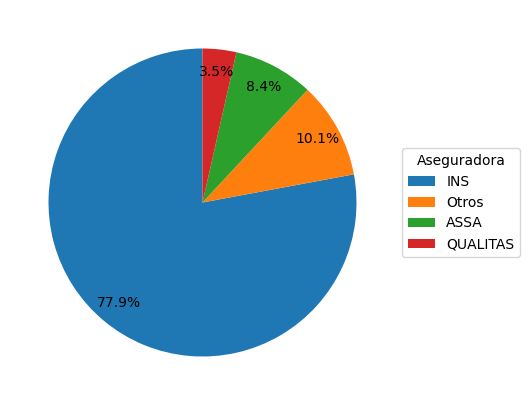

In [69]:
#Construcción del gráfico de porcentaje de participación de mercado de seguros generales

# Configurar la figura y los ejes del gráfico para seguros generales
fig1, ax1 = plt.subplots(figsize=(5, 5))
wedges, labels, textprops = ax1.pie(dataGenerales, startangle=90, autopct='%1.1f%%', pctdistance=0.85, colors=colores_aseguradoras)
ax1.set_aspect('equal')

# Ajustar manualmente la posición de las etiquetas
for label, wedge in zip(labels, wedges):
    theta = wedge.theta1 + (wedge.theta2 - wedge.theta1) / 2.0
    x = wedge.r * 0.85 * np.cos(np.deg2rad(theta))
    y = wedge.r * 0.85 * np.sin(np.deg2rad(theta))
    label.set_position((x, y))

ax1.legend(wedges, dataGenerales.index, title='Aseguradora', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))


# Mostrar el gráfico para seguros generales
plt.savefig('participacion_generales.pdf', format='pdf', bbox_inches='tight')
plt.show(fig1)


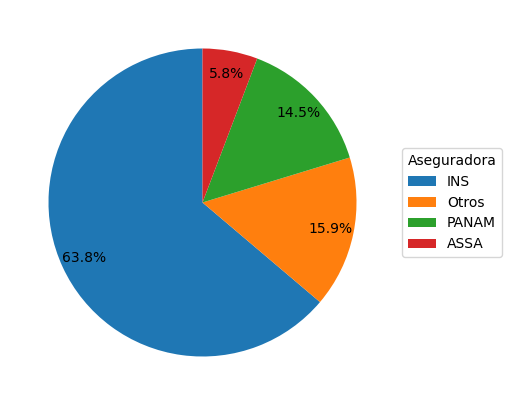

In [68]:
#Construcción del gráfico de porcentaje de participación de mercado de seguros personales

# Configurar la figura y los ejes del gráfico para seguros personales
fig2, ax2 = plt.subplots(figsize=(5, 5))
wedges, labels, textprops = ax2.pie(dataPersonales, startangle=90, autopct='%1.1f%%', pctdistance=0.85, colors=colores_aseguradoras)
ax2.set_aspect('equal')

# Ajustar manualmente la posición de las etiquetas
for label, wedge in zip(labels, wedges):
    theta = wedge.theta1 + (wedge.theta2 - wedge.theta1) / 2.0
    x = wedge.r * 0.85 * np.cos(np.deg2rad(theta))
    y = wedge.r * 0.85 * np.sin(np.deg2rad(theta))
    label.set_position((x, y))

ax2.legend(wedges, dataPersonales.index, title='Aseguradora', loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar el gráfico para seguros personales
plt.savefig('participacion_personales.pdf', format='pdf', bbox_inches='tight')
plt.show(fig2)


In [50]:
#Tabla de estadísticas para Top Aseguradoras del Mercado de Personales:
aseguradoras_personales= ['INS', 'PANAM', 'ASSA']
dataFiltradaPersonales = dataFiltrada[(dataFiltrada['Aseguradora'].isin(aseguradoras_personales)) & (dataFiltrada['Categoría'] == 'Personales')]
# Agrupar los datos filtrados por Aseguradora y obtener estadísticas
tablaPersonales = dataFiltradaPersonales.groupby('Aseguradora').agg({
    'Monto': ['sum', 'mean', 'max', 'min']
})
tablaPersonales= tablaPersonales.round(2).rename(columns={'Monto': 'Monto de primas'})
tablaPersonales

Monto de primas                                
                        sum       mean        max       min
Aseguradora                                                
ASSA              787981.37   15759.63   34081.31   2255.43
INS              8695858.19  173917.16  314126.61  58458.94
PANAM            1975824.19   39516.48   76569.49  13816.95

In [61]:
#Tabla de estadísticas para Top Aseguradoras del Mercado de Generales:
aseguradoras_generales= ['INS', 'ASSA', 'QUALITAS']
dataFiltradaGenerales = dataFiltrada[(dataFiltrada['Aseguradora'].isin(aseguradoras_generales)) & (dataFiltrada['Categoría'] == 'Generales')]
# Agrupar los datos filtrados por Aseguradora y obtener estadísticas
tablaGenerales = dataFiltradaGenerales.groupby('Aseguradora').agg({
    'Monto': ['sum', 'mean', 'max', 'min']
})
tablaGenerales= tablaGenerales.round(2).rename(columns={'Monto': 'Monto de primas'})
tablaGenerales

Monto de primas                                
                        sum       mean        max       min
Aseguradora                                                
ASSA             1102050.58   22041.01   49050.78   3922.86
INS             10224792.86  204495.86  343240.31  72283.26
QUALITAS          465011.34    9300.23   21780.21   1078.00